# FODS ASSIGNMENT-1

# TASK --- 1

### Loading data


In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('Data.csv')
print(data)
# Loaded the dataset into a pandas DataFrame

            X         Y
0    0.987988  5.098368
1    0.719720  2.516654
2   -0.403403  0.337961
3    0.107107  0.737320
4    0.345345 -0.780955
..        ...       ...
995  0.671672  3.079356
996 -0.615616  0.027487
997  0.259259  1.068320
998  0.119119  0.245188
999  0.369369  0.545114

[1000 rows x 2 columns]


### Normalize the data


In [2]:
data = pd.read_csv('Data.csv')
X_mean , Y_mean = data.mean()
X_std , Y_std = data.std()
data['X']= (data['X'] - X_mean)/X_std
shuffled_data = data.sample(frac=1)
print(shuffled_data)


            X         Y
663  1.317432  4.094605
413  1.680981  5.106110
79   0.534936  1.343978
999  0.638807  0.545114
136 -0.649195 -0.338397
..        ...       ...
416 -1.137389  0.180944
297  1.677519  3.712473
22  -0.656119  0.647884
851 -0.306420  1.778050
642 -0.746141  0.965129

[1000 rows x 2 columns]


### Splitting the data in test and train

In [3]:
split_ratio = 0.8
row_no, col_no = shuffled_data.shape
train_length = int(row_no*split_ratio)

Train = shuffled_data[:train_length]
Test = shuffled_data[train_length:]

X_Train = Train['X'].values
X_Test = Test['X'].values
Y_Test = Test['Y'].values
Y_Train = Train['Y'].values

## Polynomial Transformation function for 1 feature dataset

In [4]:
def poly_transform(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.insert(transform_data, i, transformed_feature, axis=1)
    return transform_data

## Polynomial Regression using Batch Gradient descent

[1.9766443133353555, 1.8790345668790684, 1.1574171784059597, 1.200576381209213, 1.196131165520068, 1.1793537838362473, 1.172584448718197, 1.1738075311679679, 6.786523983407903e+217]


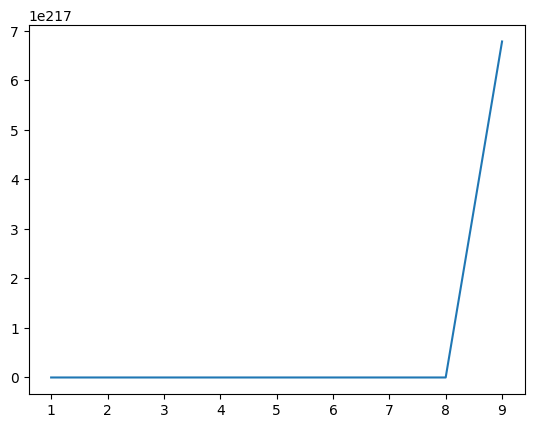

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def bgd_regressor(train, test, learning_rate=0.0022, max_iters=500):
    X = train
    Y = test
    W = np.zeros(train.shape[1])
    n = len(train)
    for _ in range(max_iters):
        Y_pred = np.dot(X, W)
        gradient = np.dot(X.T, Y_pred - Y)
        change = (learning_rate / len(X)) * gradient
        W -= change
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output = []
for i in degrees:
    X_Train_poly = poly_transform(X_Train, i)
    X_Test_poly = poly_transform(X_Test, i)
    W = bgd_regressor(X_Train_poly, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly, W)
    mse = mean_squared_error(Y_Test, Y_Test_pred)
    output.append(mse)

print(output)
plt.plot(degrees, output)
plt.show()

# Task ---- 2
 

### Loading data


In [6]:
import numpy as np
import pandas as pd
data = pd.read_csv('data2.csv')

### Normalize the data

In [7]:
data = pd.read_csv('data2.csv')
Height_mean , Width_mean , Weight_mean = data.mean()
Height_std , Width_std , Weight_std = data.std()
data['Height'] = (data['Height'] - Height_mean)/ Height_std
data['Width'] = (data['Width'] - Width_mean)/ Width_std
data = np.array(data)
np.random.shuffle(data)
print(data)

[[-4.50266827e-02  1.56669747e-01  3.06000000e+02]
 [-1.68731764e+00 -1.99897841e+00  6.70000000e+00]
 [-6.67488364e-01 -5.29412437e-01  1.30000000e+02]
 [-5.82284838e-01 -6.32271377e-01  0.00000000e+00]
 [-1.20082697e+00 -1.17776781e+00  4.00000000e+01]
 [-5.64833514e-01 -6.48050200e-01  1.40000000e+02]
 [-7.78122295e-01 -8.11058486e-01  8.00000000e+01]
 [-7.64893818e-01 -4.44883031e-01  1.25000000e+02]
 [-1.02155427e+00 -1.05936732e+00  5.15000000e+01]
 [ 1.55428922e+00  4.24909729e-01  6.10000000e+02]
 [-1.82430992e-02 -6.67150880e-01  1.50000000e+02]
 [-6.25866488e-01 -2.35902611e-01  3.00000000e+02]
 [-7.77142408e-01 -5.29412437e-01  1.20000000e+02]
 [ 5.05249974e-01  9.40509447e-01  6.50000000e+02]
 [ 1.21517825e+00  5.10744150e-01  5.00000000e+02]
 [-7.26748209e-01 -4.70686744e-01  1.30000000e+02]
 [-1.60528708e+00 -1.79373508e+00  1.22000000e+01]
 [-3.01197195e-01  5.68580060e-01  7.70000000e+02]
 [-1.52605620e+00 -1.86764640e+00  1.34000000e+01]
 [-3.93866527e-01  8.82157575e-

## Splitting the data into test and train

In [8]:
n, m = data.shape
split_ratio = 0.8
Train_2 = data[:int(0.8*n),:]
Test_2 = data[int(0.8*n):,:]
X_Train = Train_2[:,:-1]
Y_Train = Train_2[:,-1]
X_Test = Test_2[:,:-1]
X_Test_Height = X_Test[:,0]
X_Test_Width = X_Test[:,1]
Y_Test = Test_2[:,-1]

## Polynomial Transform Function for multiple feature model

In [9]:
def poly_transform_2(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.concatenate((transform_data,transformed_feature), axis=1)
    return transform_data

# Polynomial Regression

[ 3.12420798e+02  6.05605317e+01  2.75324840e+02  1.23969843e+01
  6.07016993e+01  1.51687634e-01 -1.03038371e+01]
50678.347745366074


[62157.4723152064, 51017.12765119366, 50678.347745366074, 48940.3415755708, 50334.6817006853, 50792.277309127494, nan, nan, nan]


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_18936\2946810222.py:8: RuntimeWarning: invalid value encountered in subtract
  W -= change


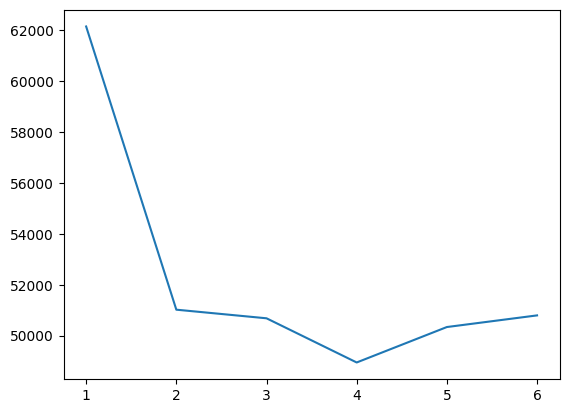

In [10]:
def poly_reg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.003, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_poly(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_transformed_Train_poly = poly_transform_2(X_Train,3)
X_Transformed_Test_poly  = poly_transform_2(X_Test,3)
W_poly = poly_reg(X_transformed_Train_poly, Y_Train)
W_poly
print(W_poly)
Y_pred_one_deg = np.dot(X_Transformed_Test_poly, W_poly)

mse_poly = mean_squared_error_poly(Y_Test, Y_pred_one_deg)
print(mse_poly)

degrees = [1,2,3,4,5,6,7,8,9]
output_poly = []
for i in degrees:
    X_Train_poly_poly = poly_transform_2(X_Train, i)
    X_Test_poly_poly = poly_transform_2(X_Test, i)
    W_bch_one = poly_reg(X_Train_poly_poly, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_poly,W_bch_one)
    mse_bch_one = mean_squared_error_poly(Y_Test, Y_Test_pred)
    output_poly.append(mse_bch_one)

print(output_poly)
plt.plot(degrees, output_poly)
plt.show()

# Batch Gradient Descent

## Batch gradient descent with q as 0.5

[520939.9984603487, 509691.9439920009, 485867.30288227496, 422151.3176902477, 322165.81867896946, 283635.83400166535, 282078.7148960869, nan, nan]


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_18936\1557772736.py:13: RuntimeWarning: invalid value encountered in power
  grad = 1/n*np.dot(X.T, Y_pred-Y) + penalty*0.5*W**-0.5


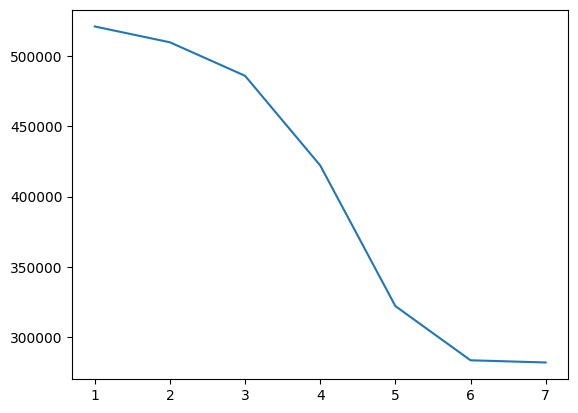

In [11]:
def half_reg(X:np.ndarray, Y:np.ndarray,max_iter = 500 ,penalty = 0.07, learning_rate = 0.000018):
    n, m = X.shape
    W = np.zeros(X.shape[1])
    for _ in range(max_iter):
        Y_pred = np.dot(X,W)
        flag = True
        for iW in W:
            if iW == 0.0:
                flag = False
        if flag == False:
            grad = 1/n*np.dot(X.T, Y_pred-Y)
        else:
            grad = 1/n*np.dot(X.T, Y_pred-Y) + penalty*0.5*W**-0.5
        W -= learning_rate*grad
        learning_rate /=1.000005
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


degrees = [1,2,3,4,5,6,7,8,9]
output_bch_half = []
for i in degrees:
    X_Train_poly_bch_half = poly_transform_2(X_Train, i)
    X_Test_poly_bch_half = poly_transform_2(X_Test, i)
    W_bch_half = half_reg(X_Train_poly_bch_half, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_half,W_bch_half)
    mse_bch_half = mean_squared_error(Y_Test, Y_Test_pred)
    output_bch_half.append(mse_bch_half)

print(output_bch_half)
plt.plot(degrees, output_bch_half)
plt.show()

## Batch gradient descent with q as 1

[311.65942707  58.82706041 273.62932777  11.75438946  61.36930067
   1.06021257  -9.80345394]
50828.99623184079


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_18936\3825926075.py:8: RuntimeWarning: invalid value encountered in subtract
  W -= change


[62346.18571964844, 51125.23029581274, 50828.99623184079, 49182.300055413194, 50467.312663142926, 50955.274517915925, nan, nan, nan]


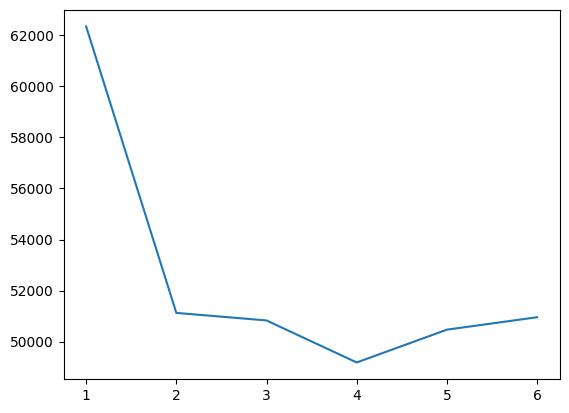

In [12]:
def one_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 0.5*l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_one_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_transformed_Train = poly_transform_2(X_Train,3)
X_Transformed_Test  = poly_transform_2(X_Test,3)
W_one = one_deg(X_transformed_Train, Y_Train)
W_one
print(W_one)
Y_pred_one_deg = np.dot(X_Transformed_Test, W_one)

mse_one = mean_squared_error_one_deg(Y_Test, Y_pred_one_deg)
print(mse_one)

degrees = [1,2,3,4,5,6,7,8,9]
output_bch_one = []
for i in degrees:
    X_Train_poly_bch_one = poly_transform_2(X_Train, i)
    X_Test_poly_bch_one = poly_transform_2(X_Test, i)
    W_bch_one = one_deg(X_Train_poly_bch_one, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_one,W_bch_one)
    mse_bch_one = mean_squared_error_one_deg(Y_Test, Y_Test_pred)
    output_bch_one.append(mse_bch_one)

print(output_bch_one)
plt.plot(degrees, output_bch_one)
plt.show()

## Batch gradient descent with q as 2

[ 3.16270702e+02  1.56672071e+01  3.32103623e+02 -2.25238923e-01
  6.45710356e+01  1.37824222e+01 -2.70551392e+01]
47174.71556805013


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_18936\3636682.py:6: RuntimeWarning: invalid value encountered in add
  gradient = np.dot(X.T, Y_pred-Y) + l1_penalty*(np.abs(W))
C:\Users\ROHAN\AppData\Local\Temp\ipykernel_18936\3636682.py:8: RuntimeWarning: invalid value encountered in subtract
  W -= change


[62678.14142037929, 50981.66538395159, 47174.71556805013, 46402.966497401445, nan, nan, nan, nan, nan]


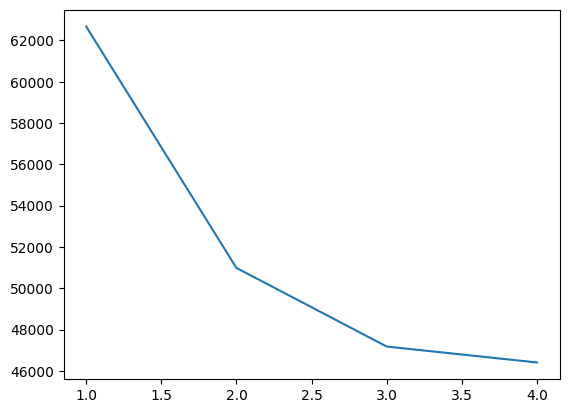

In [13]:
def two_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.0002, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = np.dot(X.T, Y_pred-Y) + l1_penalty*(np.abs(W))
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_two_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) **2)

X_transformed_two = poly_transform_2(X_Train,3)
X_transformed_Test_two = poly_transform_2(X_Test,3)
W_two = two_deg(X_transformed_two, Y_Train)
print(W_two)
Y_pred_two_deg = np.dot(X_transformed_Test_two, W_two)
mse_two = mean_squared_error_two_deg(Y_Test, Y_pred_two_deg)
print(mse_two)

degrees = [1,2,3,4,5,6,7,8,9]
output_bch_two = []
for i in degrees:
    X_Train_poly_bch_two = poly_transform_2(X_Train, i)
    X_Test_poly_bch_two = poly_transform_2(X_Test, i)
    W_bch_two = two_deg(X_Train_poly_bch_two, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_two,W_bch_two)
    mse_bch_two = mean_squared_error_two_deg(Y_Test, Y_Test_pred)
    output_bch_two.append(mse_bch_two)

print(output_bch_two)
plt.plot(degrees, output_bch_two)
plt.show()

## Batch gradient descent with q as 4

[6.94793443 5.48392569 5.89185467 6.89674249 7.06315385 7.39704259
 7.48095947]
444828.904825805


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_18936\2680744456.py:6: RuntimeWarning: overflow encountered in power
  gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 2*l1_penalty*(np.abs(W**3))
C:\Users\ROHAN\AppData\Local\Temp\ipykernel_18936\2680744456.py:6: RuntimeWarning: invalid value encountered in add
  gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 2*l1_penalty*(np.abs(W**3))


[507814.29802875663, 484053.86031908786, 444828.904825805, 375210.2178992417, 295879.877300023, nan, nan, nan, nan]


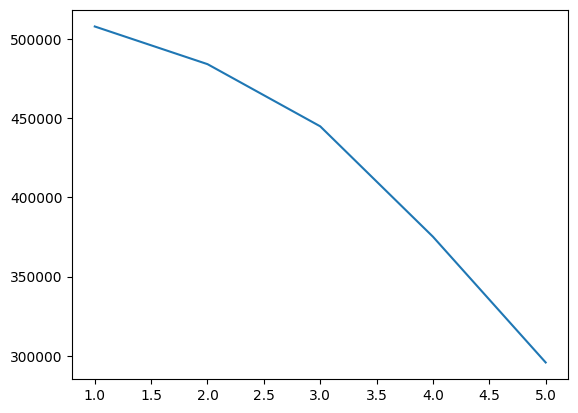

In [14]:
def four_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.005, l1_penalty = 0.5, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 2*l1_penalty*(np.abs(W**3))
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_four_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) **2)

X_transformed_four = poly_transform_2(X_Train,3)
X_transformed_Test_four = poly_transform_2(X_Test,3)
W_four = four_deg(X_transformed_four, Y_Train)
print(W_four)
Y_pred_four_deg = np.dot(X_transformed_Test_four, W_four)
mse_four = mean_squared_error_four_deg(Y_Test, Y_pred_four_deg)
print(mse_four)

degrees = [1,2,3,4,5,6,7,8,9]
output_bch_four = []
for i in degrees:
    X_Train_poly_bch_four = poly_transform_2(X_Train, i)
    X_Test_poly_bch_four = poly_transform_2(X_Test, i)
    W_bch_four = four_deg(X_Train_poly_bch_four, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_four,W_bch_four)
    mse_bch_four = mean_squared_error_four_deg(Y_Test, Y_Test_pred)
    output_bch_four.append(mse_bch_four)

print(output_bch_four)
plt.plot(degrees, output_bch_four)
plt.show()

# Stocastic Gradeint Descent

## Stocastic gradient descent with q as 0.5

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_18936\2810593580.py:19: RuntimeWarning: invalid value encountered in subtract
  W -= learning_rate*grad


[68811.61431228212, 54664.898156717565, 65608.12791347875, 65664.31655840481, 74009.33143393531, 1.0677288903509492e+210, nan, nan, nan]


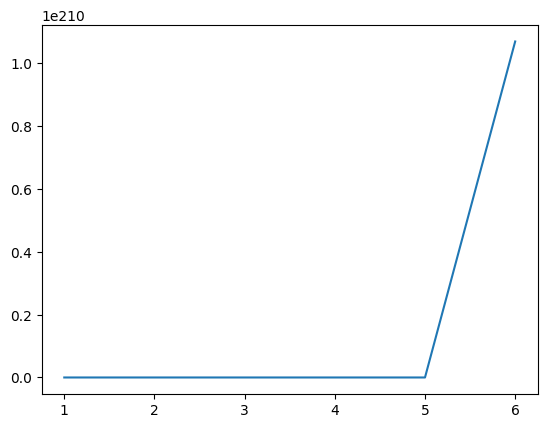

In [15]:
def half_reg_stc(X:np.ndarray, Y:np.ndarray,max_iter = 5000 ,penalty = 0.07, learning_rate = 1e-3):
    n, m = X.shape
    W = np.zeros(X.shape[1])
    for _ in range(max_iter):
        idx = np.random.randint(0, n-1)
        X_temp = X[idx]
        Y_temp = Y[idx]
        Y_pred = np.dot(X_temp,W)
        flag = True
        for iW in W:
            if iW == 0.0:
                flag = False
                break

        if flag == False:
            grad = np.dot(X_temp.T, Y_pred-Y_temp)
        else:
            grad = np.dot(X_temp.T, Y_pred-Y_temp) + penalty*0.5*np.abs(W)**-0.5
        W -= learning_rate*grad
        learning_rate /=1.00005
    return W

def mean_squared_error_stc_half(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output_stc_half = []
for i in degrees:
    X_Train_poly_stc_half = poly_transform_2(X_Train, i)
    X_Test_poly_stc_half = poly_transform_2(X_Test, i)
    W_stc_half = half_reg_stc(X_Train_poly_stc_half, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_stc_half,W_stc_half)
    mse_stc_half = mean_squared_error_stc_half(Y_Test, Y_Test_pred)
    output_stc_half.append(mse_stc_half)
 
print(output_stc_half)
plt.plot(degrees, output_stc_half)
plt.show()

## Stocastic gradient descent with q as 1

[188014.82206177927, 115931.82744806551, 103012.94657624968, 114373.99656911619, 119544.08525142558, 106277.23421556206, 4.5179369418159805e+88, nan, nan]


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_18936\3967441090.py:11: RuntimeWarning: invalid value encountered in subtract
  W -= change


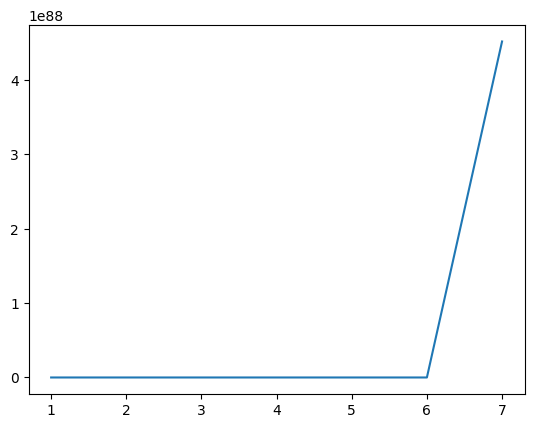

In [16]:
def one_deg_stoic(X: np.ndarray,Y: np.ndarray, learning_rate = 0.0003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    idx = np.random.randint(0, n-1)
    X_temp_stoic = X[idx]
    Y_temp_stoic = Y[idx]
    Y_pred = np.dot(X_temp_stoic, W)
    gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + 0.5*l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_one_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output_stc_one = []
for i in degrees:
    X_Train_poly_stc_one = poly_transform_2(X_Train, i)
    X_Test_poly_stc_one = poly_transform_2(X_Test, i)
    W_stc_one = one_deg_stoic(X_Train_poly_stc_one, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_stc_one,W_stc_one)
    mse_stc_one = mean_squared_error_one_deg(Y_Test, Y_Test_pred)
    output_stc_one.append(mse_stc_one)
 
print(output_stc_one)
plt.plot(degrees, output_stc_one)
plt.show()

## Stocastic gradient descent with q as 2

[300385.93932482536, 192909.762748298, 143637.34550566904, 146600.94487875444, 140370.42836425814, 355540.3100534839, 8.147430091193254e+134, nan, nan]


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_18936\1971062650.py:9: RuntimeWarning: invalid value encountered in add
  gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + l1_penalty*np.abs(W)
C:\Users\ROHAN\AppData\Local\Temp\ipykernel_18936\1971062650.py:11: RuntimeWarning: invalid value encountered in subtract
  W -= change


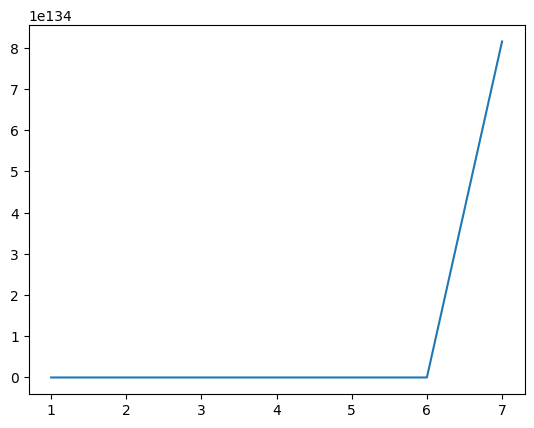

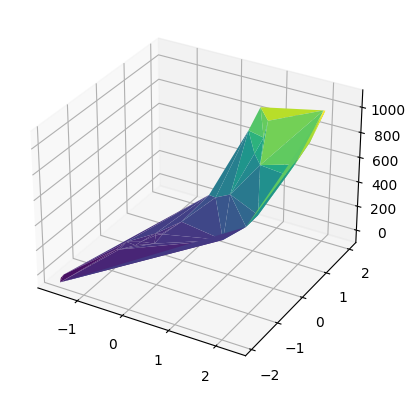

In [17]:
def two_deg_stoic(X: np.ndarray,Y: np.ndarray, learning_rate = 0.0003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    idx = np.random.randint(0, n-1)
    X_temp_stoic = X[idx]
    Y_temp_stoic = Y[idx]
    Y_pred = np.dot(X_temp_stoic, W)
    gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + l1_penalty*np.abs(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_two_deg_stoic(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output_stc_two = []
for i in degrees:
    X_Train_poly_stc_two = poly_transform_2(X_Train, i)
    X_Test_poly_stc_two = poly_transform_2(X_Test, i)
    W_stc_two = two_deg_stoic(X_Train_poly_stc_two, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_stc_two,W_stc_two)
    mse_stc_two = mean_squared_error_two_deg_stoic(Y_Test, Y_Test_pred)
    output_stc_two.append(mse_stc_two)
 
print(output_stc_two)
plt.plot(degrees, output_stc_two)
plt.show()
X_Train_poly_stc_two = poly_transform_2(X_Train, 3)
X_Test_poly_stc_two = poly_transform_2(X_Test, 3)
W_stc_two = two_deg_stoic(X_Train_poly_stc_two, Y_Train)
Y_Test_pred = np.dot(X_Test_poly_stc_two,W_stc_two)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X_Test_Height, X_Test_Width, Y_Test_pred, cmap='viridis', edgecolor='none')
plt.show()

## Stocastic gradient descent with q as 4

[491457.20782379765, 445899.15641210123, 353011.5582325782, 259551.32538897006, 221223.238786889, 275293.57273676107, 26154343.299932003, nan, nan]


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_18936\1806106902.py:9: RuntimeWarning: overflow encountered in power
  gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + 3/2*l1_penalty*W**3


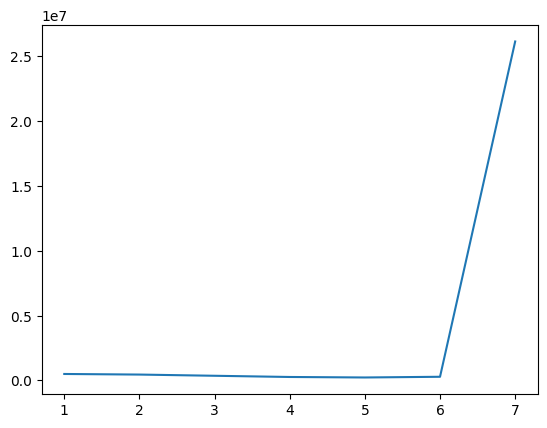

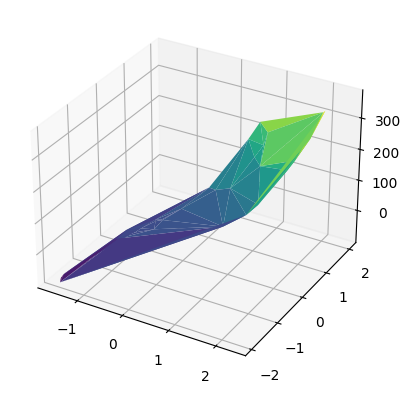

In [23]:
def four_deg_stoic(X: np.ndarray,Y: np.ndarray, learning_rate = 1e-4, l1_penalty = 0.009, max_iters = 1000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    idx = np.random.randint(0, n-1)
    X_temp_stoic = X[idx]
    Y_temp_stoic = Y[idx]
    Y_pred = np.dot(X_temp_stoic, W)
    gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + 3/2*l1_penalty*W**3
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_four_deg_stoic(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output_stc_four = []
for i in degrees:
    X_Train_poly_stc_four = poly_transform_2(X_Train, i)
    X_Test_poly_stc_four = poly_transform_2(X_Test, i)
    W_stc_four = four_deg_stoic(X_Train_poly_stc_four, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_stc_four,W_stc_four)
    mse_stc_four = mean_squared_error_four_deg_stoic(Y_Test, Y_Test_pred)
    output_stc_four.append(mse_stc_four)
 
print(output_stc_four)
plt.plot(degrees, output_stc_four)
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# x, y, z are arrays of the same length containing the cartesian coordinates of the points
X_Train_poly_stc_four = poly_transform_2(X_Train, 3)
X_Test_poly_stc_four = poly_transform_2(X_Test, 3)
W_stc_four = four_deg_stoic(X_Train_poly_stc_four, Y_Train)
Y_Test_pred = np.dot(X_Test_poly_stc_four,W_stc_four)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X_Test_Height, X_Test_Width, Y_Test_pred, cmap='viridis', edgecolor='none')
plt.show()


# Task --- 4

## Comparative Analysis

### Polynomial Regression

[62157.4723152064, 51017.12765119366, 50678.347745366074, 48940.3415755708, 50334.6817006853, 50792.277309127494, nan, nan, nan]


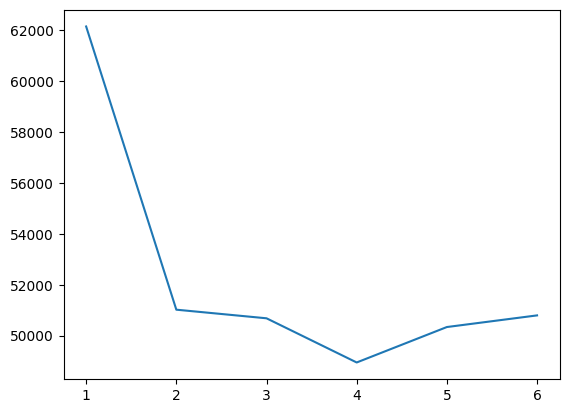

In [19]:
print(output_poly)
plt.plot(degrees, output_poly)
plt.show()

### We see that in the above curve the curve gets minimum value on degree equal to 4 the graph is between mean square error and corresponding degrees. So the best model is with degree equal to 4

## Batch Gradient Descent vs Stochastic Gradient Descent 0.5 degree

[68811.61431228212, 54664.898156717565, 65608.12791347875, 65664.31655840481, 74009.33143393531, 1.0677288903509492e+210, nan, nan, nan]


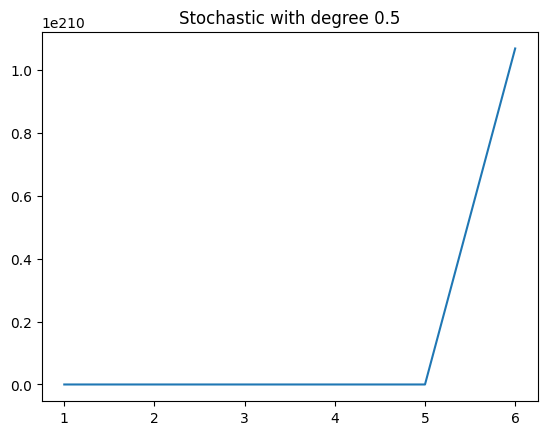

[520939.9984603487, 509691.9439920009, 485867.30288227496, 422151.3176902477, 322165.81867896946, 283635.83400166535, 282078.7148960869, nan, nan]


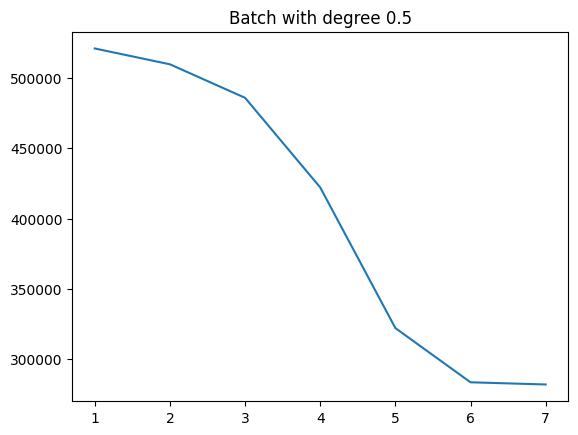

In [20]:
print(output_stc_half)
plt.plot(degrees, output_stc_half)
plt.title("Stochastic with degree 0.5")
plt.show()
print(output_bch_half)
plt.plot(degrees, output_bch_half)
plt.title("Batch with degree 0.5")
plt.show()

### We see that in above comparison both graphs give minima at degrees between 4-6 The lowest mean square error in batch gradient descent is smaller than the lowest mean square error in stochastic gradient descent .So among these two the better model is the batch gradient descent for degree 0.5 as it is giving less mean square error


## Batch Gradient Descent vs Stochastic Gradient Descent 1 degree

[62346.18571964844, 51125.23029581274, 50828.99623184079, 49182.300055413194, 50467.312663142926, 50955.274517915925, nan, nan, nan]


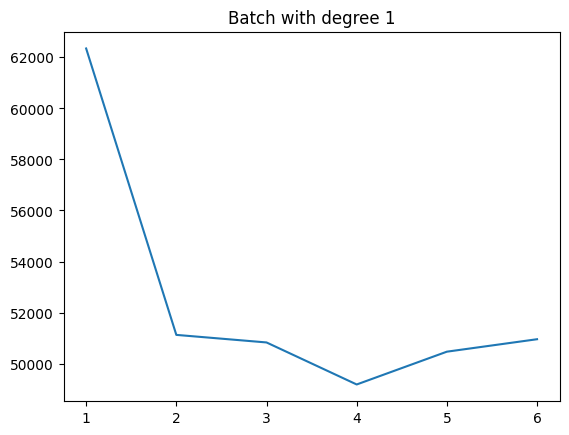

[188014.82206177927, 115931.82744806551, 103012.94657624968, 114373.99656911619, 119544.08525142558, 106277.23421556206, 4.5179369418159805e+88, nan, nan]


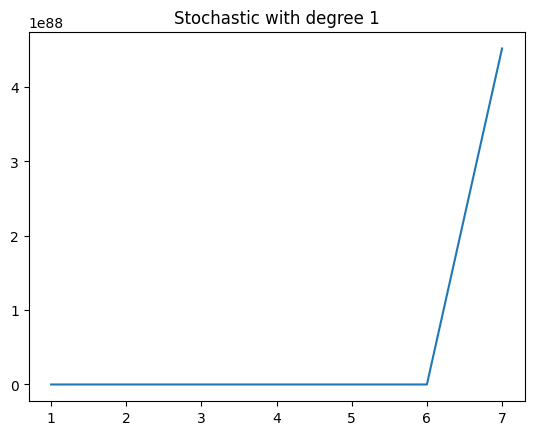

In [21]:
print(output_bch_one)
plt.plot(degrees, output_bch_one)
plt.title("Batch with degree 1")
plt.show()

print(output_stc_one)
plt.plot(degrees, output_stc_one)
plt.title("Stochastic with degree 1")
plt.show()

### We see that in above comparison both graphs give minima at degrees between 4-6 The lowest mean square error in batch gradient descent smaller than the lowest mean square error in stochastic gradient descent .So among these two the better model is the batch gradient descent for degree 1 as it is giving less mean square error

## Batch Gradient Descent vs Stochastic Gradient Descent 2 degree

[62678.14142037929, 50981.66538395159, 47174.71556805013, 46402.966497401445, nan, nan, nan, nan, nan]


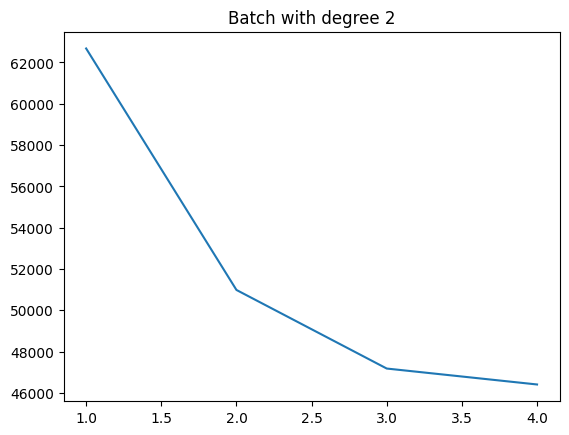

[300385.93932482536, 192909.762748298, 143637.34550566904, 146600.94487875444, 140370.42836425814, 355540.3100534839, 8.147430091193254e+134, nan, nan]


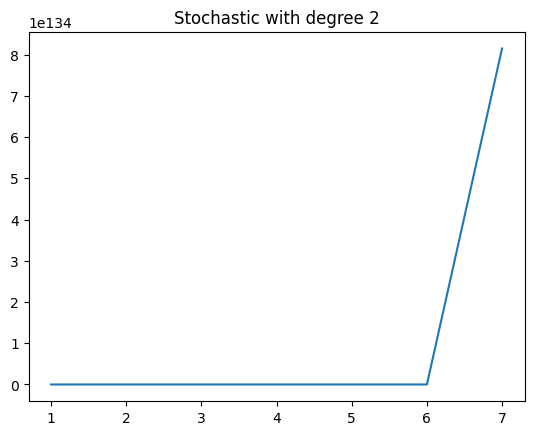

In [22]:
print(output_bch_two)
plt.plot(degrees, output_bch_two)
plt.title("Batch with degree 2")
plt.show()

print(output_stc_two)
plt.plot(degrees, output_stc_two)
plt.title("Stochastic with degree 2")
plt.show()

### We see that in above comparison both graphs give minima at degrees between 4-6 The lowest mean square error in batch gradient descent is smaller than the lowest mean square error in stochastic gradient descent .So among these two the better model is the batch gradient descent for degree 2 as it is giving less mean square error

## Batch Gradient Descent vs Stochastic Gradient Descent 4 degree

[507814.29802875663, 484053.86031908786, 444828.904825805, 375210.2178992417, 295879.877300023, nan, nan, nan, nan]


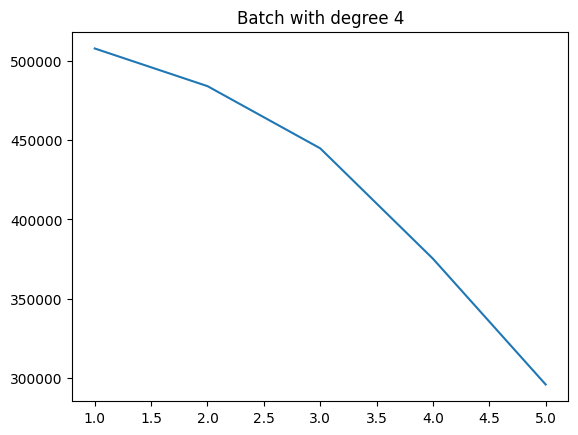

[491457.20782379765, 445899.15641210123, 353011.5582325782, 259551.32538897006, 221223.238786889, 275293.57273676107, 26154343.299932003, nan, nan]


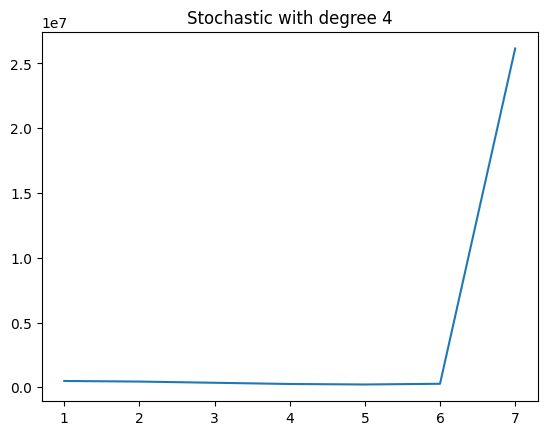

In [25]:
print(output_bch_four)
plt.plot(degrees, output_bch_four)
plt.title("Batch with degree 4")
plt.show()
print(output_stc_four)
plt.plot(degrees, output_stc_four)
plt.title("Stochastic with degree 4")
plt.show()

### We see that in above comparison both graphs give minima at degrees between 4-6 The lowest mean square error in batch gradient descent is smaller than the lowest mean square error in stochastic gradient descent. So among these two the better model is the batch gradient descent for degree 2 as it is giving less mean square error